In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
df = pd.read_csv("bank-full.csv", sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
df['customer_id'] = range(1, len(df)+1)

In [4]:
df.set_index('customer_id', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 1 to 45211
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [6]:
df['balance'].mean()

1362.2720576850766

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df['duration'] = df['duration']/60
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
customer_id,,,,,,,,,,,,,,,,,
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.266667,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.533333,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.300000,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,2.316667,1,-1,0,unknown,no
7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,3.616667,1,-1,0,unknown,no
8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,6.333333,1,-1,0,unknown,no
9,58,retired,married,primary,no,121,yes,no,unknown,5,may,0.833333,1,-1,0,unknown,no


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,4.302718,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,4.292130,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.716667,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,3.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,5.316667,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,81.966667,63.000000,871.000000,275.000000


In [55]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

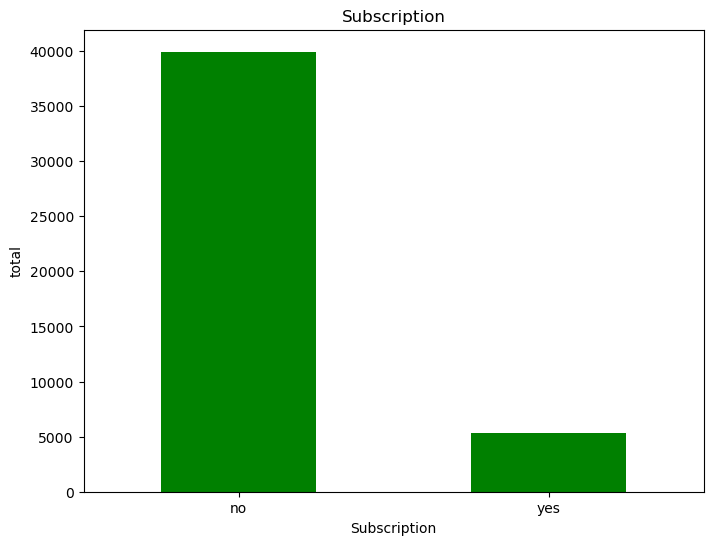

In [58]:
plt.figure(figsize=(8,6))
df['y'].value_counts().plot(kind='bar', color='green')
plt.title('Subscription')
plt.xlabel('Subscription')
plt.xticks(rotation=0)
plt.ylabel("total")
plt.show()

Jumlah pelanggan yang tidak berlangganan adalah 39922 dan yang memutuskan berlangganan adalah 5289. Terdapat ketidakseimbangan data yang sangat besar.

In [57]:
df['age'].value_counts()

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

In [11]:
bins = [0, 25, 50, 75, 100]
labels = ["Young","Adult","Senior","Very Senior"]

In [12]:
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
customer_id,,,,,,,,,,,,,,,,,,
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no,Senior
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no,Adult
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.266667,1,-1,0,unknown,no,Adult
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.533333,1,-1,0,unknown,no,Adult
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.300000,1,-1,0,unknown,no,Adult


In [13]:
df['age_group'].value_counts()

age_group
Adult          34620
Senior          8994
Young           1336
Very Senior      261
Name: count, dtype: int64

In [14]:
df_very_senior = df[df['age_group']=='Very Senior']
df_very_senior.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
customer_id,,,,,,,,,,,,,,,,,,
29159,83,retired,married,primary,no,425,no,no,telephone,2,feb,15.200000,1,-1,0,unknown,no,Very Senior
29323,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,4.716667,2,-1,0,unknown,no,Very Senior
30909,76,retired,married,primary,no,2590,no,no,telephone,9,feb,1.133333,12,-1,0,unknown,no,Very Senior
31052,83,retired,single,primary,no,3349,no,no,telephone,12,feb,1.483333,1,-1,0,unknown,no,Very Senior
31056,85,retired,married,primary,no,12114,no,no,telephone,12,feb,2.750000,2,-1,0,unknown,yes,Very Senior
31070,90,retired,divorced,secondary,no,1,no,no,cellular,13,feb,2.533333,3,-1,0,unknown,yes,Very Senior
31090,82,retired,married,tertiary,no,278,no,no,cellular,16,feb,3.716667,7,-1,0,unknown,no,Very Senior
31126,78,retired,married,primary,no,158,no,no,cellular,18,feb,6.000000,1,-1,0,unknown,no,Very Senior
31131,85,retired,divorced,primary,no,7613,no,no,cellular,18,feb,5.916667,3,-1,0,unknown,yes,Very Senior


#### Segmentation Customer

In [15]:
# age

age_group_seg = df['age_group'].value_counts()
age_group_seg = age_group_seg.reset_index()
age_group_seg.columns = ['group', 'total']
age_group_seg

,group,total
0,Adult,34620
1,Senior,8994
2,Young,1336
3,Very Senior,261


<Figure size 800x600 with 0 Axes>

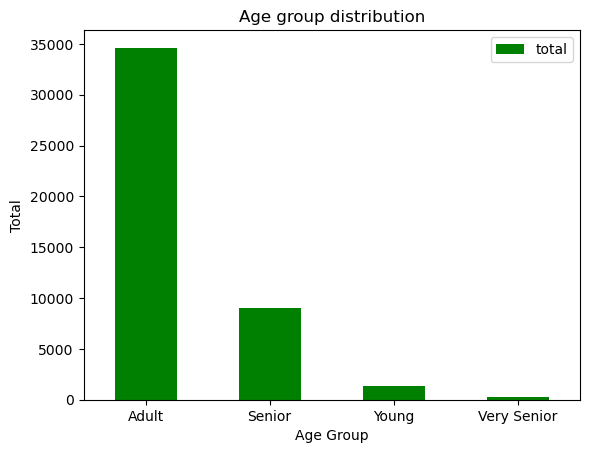

In [16]:
plt.figure(figsize=(8,6))
age_group_seg.plot(kind='bar', x='group', y='total', color='g')
plt.title("Age group distribution")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.ylabel("Total")
plt.show()

In [17]:
# marital segment

marital_seg = df['marital'].value_counts()
marital_seg

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

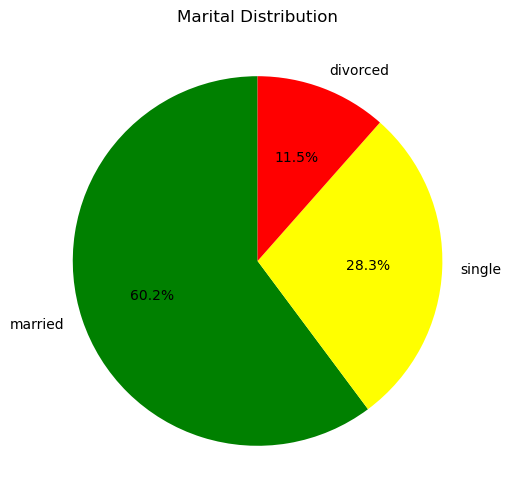

In [18]:
plt.figure(figsize=(8,6))
plt.pie(marital_seg, labels=marital_seg.index, autopct = '%1.1f%%', startangle=90, colors=['green', 'yellow', 'red'])
plt.title("Marital Distribution")
plt.show()

In [19]:
subscribed = df[df['y']=='yes']
subscribed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
customer_id,,,,,,,,,,,,,,,,,,
84,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,17.366667,1,-1,0,unknown,yes,Senior
87,56,admin.,married,secondary,no,45,no,no,unknown,5,may,24.450000,1,-1,0,unknown,yes,Senior
88,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,23.150000,1,-1,0,unknown,yes,Adult
130,55,services,married,secondary,no,2476,yes,no,unknown,5,may,9.650000,1,-1,0,unknown,yes,Senior
169,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,11.216667,2,-1,0,unknown,yes,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,5.000000,1,40,8,failure,yes,Senior
45206,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,6.433333,2,-1,0,unknown,yes,Young
45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,16.283333,3,-1,0,unknown,yes,Senior


In [20]:
# education segment dist.

edu_seg = df['education'].value_counts()
edu_seg

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

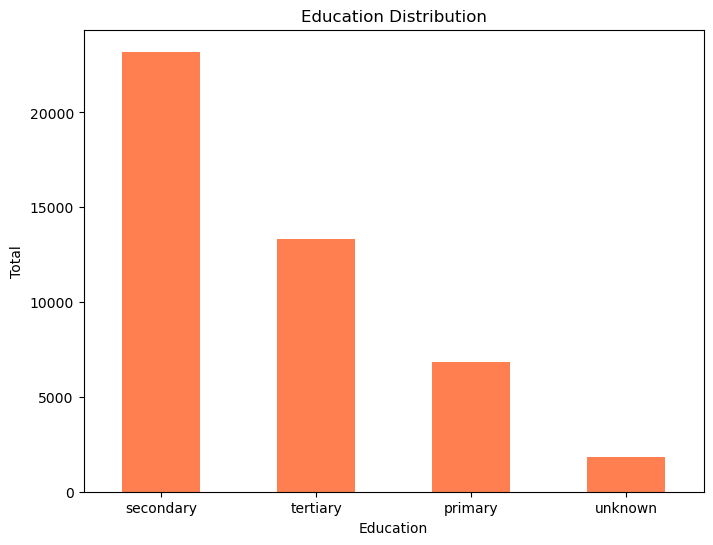

In [21]:
plt.figure(figsize=(8,6))
edu_seg.plot(kind='bar', color='coral')
plt.title("Education Distribution")
plt.xlabel("Education")
plt.xticks(rotation=0)
plt.ylabel("Total")
plt.show()

In [22]:
# job segment dist

job_seg = df['job'].value_counts()
job_seg

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

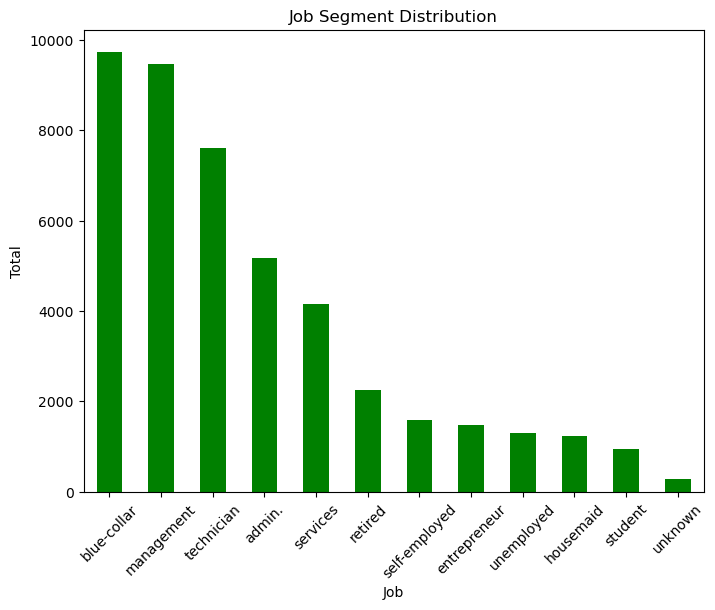

In [23]:
plt.figure(figsize=(8,6))
job_seg.plot(kind='bar', color='green')
plt.title("Job Segment Distribution")
plt.xlabel("Job")
plt.xticks(rotation=45)
plt.ylabel("Total")
plt.show()

In [24]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [25]:
income_minus = df[df['balance']<0]
income_minus

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
customer_id,,,,,,,,,,,,,,,,,,
26,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,2.866667,1,-1,0,unknown,no,Adult
29,46,management,single,secondary,no,-246,yes,no,unknown,5,may,4.250000,2,-1,0,unknown,no,Adult
37,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,6.083333,1,-1,0,unknown,no,Young
38,53,technician,married,secondary,no,-3,no,no,unknown,5,may,27.766667,1,-1,0,unknown,no,Senior
46,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,4.033333,1,-1,0,unknown,no,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44627,31,services,single,secondary,no,-205,no,no,cellular,1,sep,8.016667,1,579,1,failure,yes,Adult
44630,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,3.316667,1,92,14,success,yes,Adult
44837,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,0.150000,1,-1,0,unknown,no,Adult


In [26]:
bins = [-8019, 0, 72, 448, 1428, 102127]
labels = ["Lower/Debt", "Low", "Low-medium", "Medium-high", "High"]

In [27]:
df['income_group'] = pd.cut(df['balance'], bins=bins, labels=labels, right=True)
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,income_group
customer_id,,,,,,,,,,,,,,,,,,,
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no,Senior,High
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no,Adult,Low
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.266667,1,-1,0,unknown,no,Adult,Low
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.533333,1,-1,0,unknown,no,Adult,High
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.300000,1,-1,0,unknown,no,Adult,Low
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,2.316667,1,-1,0,unknown,no,Adult,Low-medium
7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,3.616667,1,-1,0,unknown,no,Adult,Low-medium
8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,6.333333,1,-1,0,unknown,no,Adult,Low
9,58,retired,married,primary,no,121,yes,no,unknown,5,may,0.833333,1,-1,0,unknown,no,Senior,Low-medium


In [28]:
df.head(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,income_group
customer_id,,,,,,,,,,,,,,,,,,,
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no,Senior,High
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no,Adult,Low
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.266667,1,-1,0,unknown,no,Adult,Low
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.533333,1,-1,0,unknown,no,Adult,High
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.300000,1,-1,0,unknown,no,Adult,Low
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,2.316667,1,-1,0,unknown,no,Adult,Low-medium
7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,3.616667,1,-1,0,unknown,no,Adult,Low-medium
8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,6.333333,1,-1,0,unknown,no,Adult,Low
9,58,retired,married,primary,no,121,yes,no,unknown,5,may,0.833333,1,-1,0,unknown,no,Senior,Low-medium


In [29]:
df['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

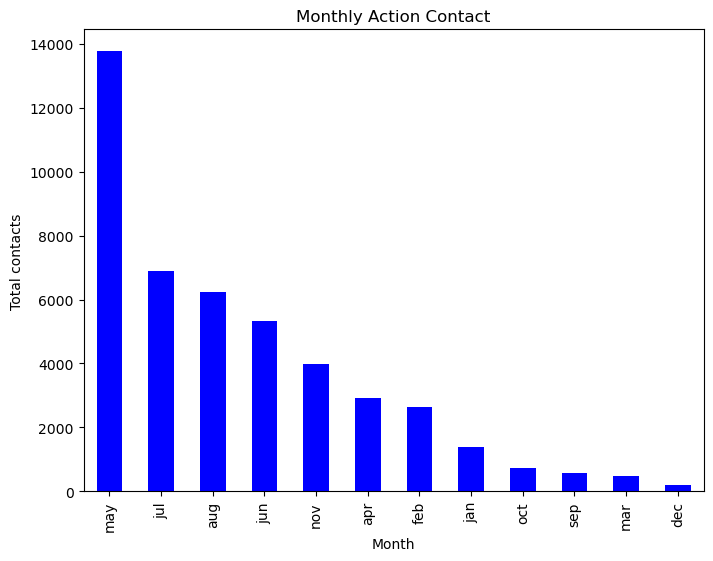

In [30]:
plt.figure(figsize=(8,6))
df['month'].value_counts().plot(kind='bar', color='blue')
plt.title("Monthly Action Contact")
plt.xlabel("Month")
plt.ylabel("Total contacts")
plt.show()

In [31]:
month_to_y = df.groupby('month')['y'].value_counts()
month_to_y

month  y  
apr    no      2355
       yes      577
aug    no      5559
       yes      688
dec    no       114
       yes      100
feb    no      2208
       yes      441
jan    no      1261
       yes      142
jul    no      6268
       yes      627
jun    no      4795
       yes      546
mar    yes      248
       no       229
may    no     12841
       yes      925
nov    no      3567
       yes      403
oct    no       415
       yes      323
sep    no       310
       yes      269
Name: count, dtype: int64

In [32]:
month_to_y = month_to_y.reset_index()
month_to_y.columns = ['month', 'subscribe', 'total']
month_to_y

,month,subscribe,total
0,apr,no,2355
1,apr,yes,577
2,aug,no,5559
3,aug,yes,688
4,dec,no,114
5,dec,yes,100
6,feb,no,2208
7,feb,yes,441
8,jan,no,1261
9,jan,yes,142


In [33]:
m_y_pivot = month_to_y.pivot(index='month', columns='subscribe', values='total')
m_y_pivot

subscribe,no,yes
month,,
apr,2355,577
aug,5559,688
dec,114,100
feb,2208,441
jan,1261,142
jul,6268,627
jun,4795,546
mar,229,248
may,12841,925


In [34]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
m_y_pivot.index = pd.Categorical(m_y_pivot.index, categories=month_order, ordered=True)

m_y_pivot = m_y_pivot.sort_index()
m_y_pivot

subscribe,no,yes
jan,1261,142
feb,2208,441
mar,229,248
apr,2355,577
may,12841,925
jun,4795,546
jul,6268,627
aug,5559,688
sep,310,269
oct,415,323


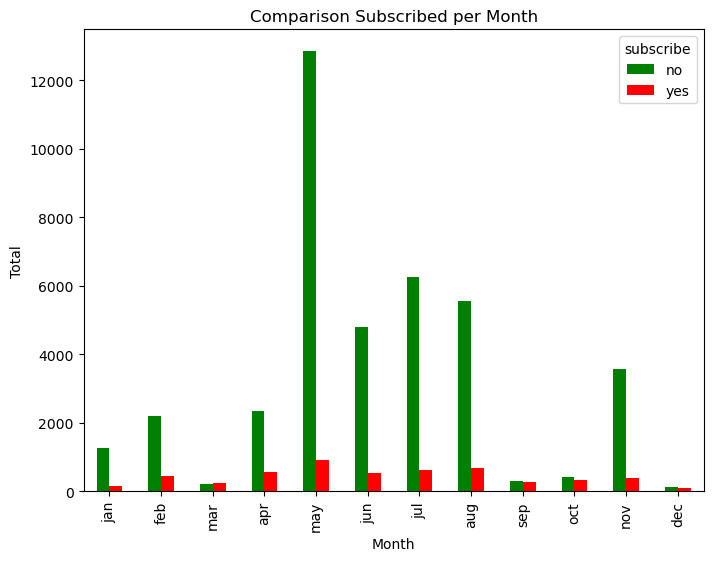

In [35]:
m_y_pivot.plot(kind='bar', figsize=(8,6), color=['green', 'red'])
plt.title("Comparison Subscribed per Month")
plt.xlabel("Month")
plt.ylabel("Total")
plt.show()

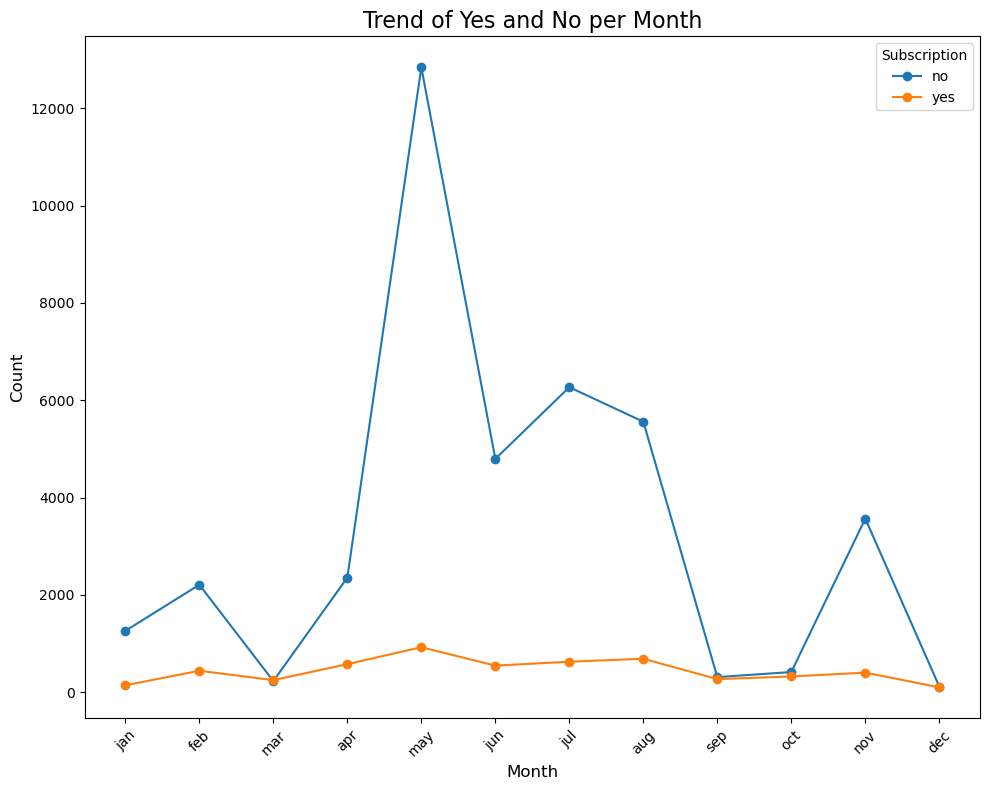

In [36]:
m_y_pivot.sort_index().plot(kind='line', marker='o', figsize=(10,8))
plt.title('Trend of Yes and No per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Subscription')
plt.xticks(ticks=range(len(month_order)), labels=month_order, rotation=45)
plt.tight_layout()
plt.show()

In [37]:
# comparision by demografi
demo_age_y = df.groupby('age_group')['y'].value_counts()
demo_age_y = demo_age_y.reset_index()
demo_age_y.columns = ['age_group', 'subscribed', 'total']

demo_age_piv = demo_age_y.pivot(index='age_group', columns='subscribed', values='total')
demo_age_piv

C:\Users\Edy\AppData\Local\Temp\ipykernel_8176\3085313428.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_age_y = df.groupby('age_group')['y'].value_counts()


subscribed,no,yes
age_group,,
Young,1016,320
Adult,30964,3656
Senior,7798,1196
Very Senior,144,117


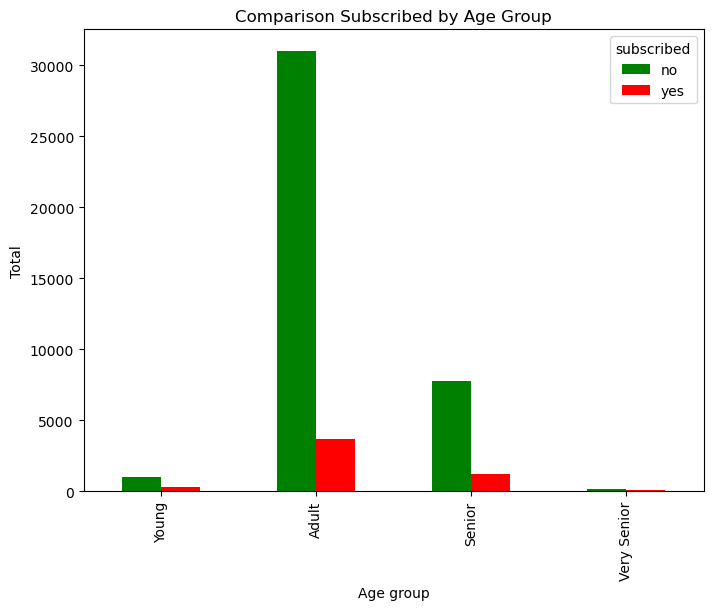

In [38]:
demo_age_piv.plot(kind='bar', figsize=(8,6), color=['green', 'red'])
plt.title("Comparison Subscribed by Age Group")
plt.xlabel("Age group")
plt.ylabel("Total")
plt.show()

In [39]:
demo_income_y = df.groupby('income_group')['y'].value_counts()
demo_income_y = demo_income_y.reset_index()
demo_income_y.columns = ['income_group', 'subscribed', 'total']

demo_income_piv = demo_income_y.pivot(index='income_group', columns='subscribed', values='total')
demo_income_piv

C:\Users\Edy\AppData\Local\Temp\ipykernel_8176\2183432305.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_income_y = df.groupby('income_group')['y'].value_counts()


subscribed,no,yes
income_group,,
Lower/Debt,6777,502
Low,3720,317
Low-medium,10061,1230
Medium-high,9891,1415
High,9472,1825


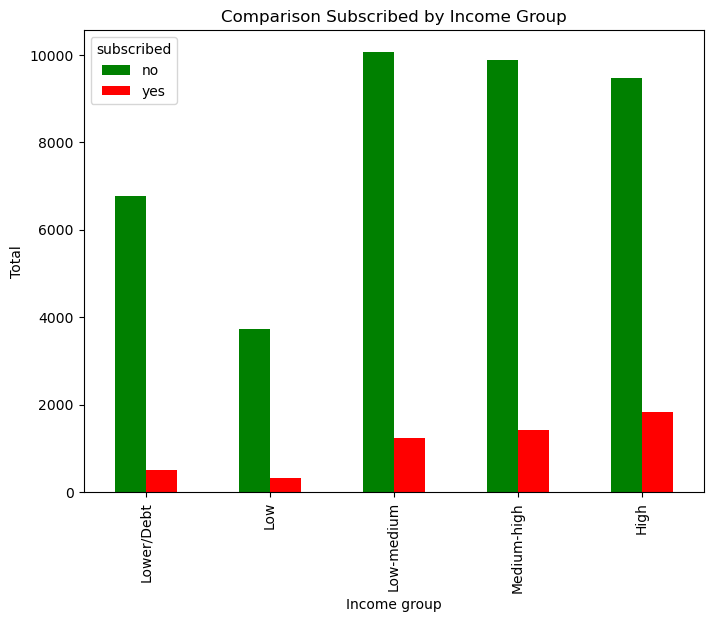

In [40]:
demo_income_piv.plot(kind='bar', figsize=(8,6), color=['green', 'red'])
plt.title("Comparison Subscribed by Income Group")
plt.xlabel("Income group")
plt.ylabel("Total")
plt.show()

In [41]:
contact_y = df.groupby('contact')['y'].value_counts()
contact_y = contact_y.reset_index()
contact_y.columns = ['contact','subscribed','total']

contact_piv = contact_y.pivot(index='contact', columns='subscribed', values='total')
contact_piv

subscribed,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


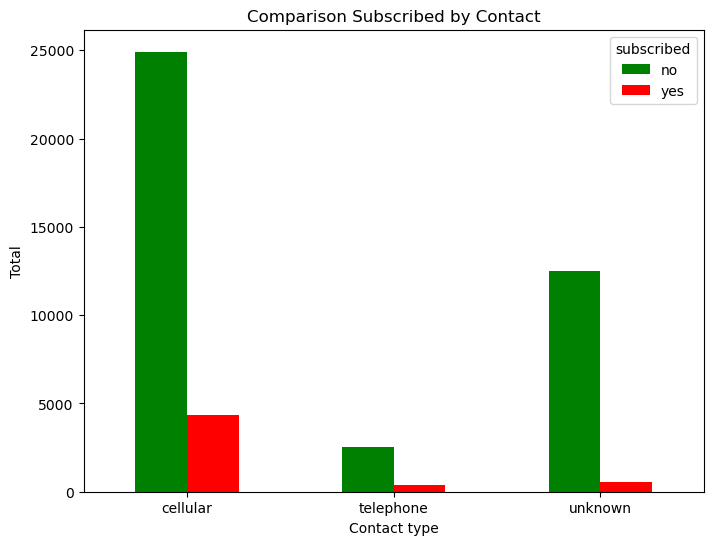

In [42]:
contact_piv.plot(kind='bar', figsize=(8,6), color=['green', 'red'])
plt.title("Comparison Subscribed by Contact")
plt.xlabel("Contact type")
plt.xticks(rotation=0)
plt.ylabel("Total")
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 1 to 45211
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           45211 non-null  int64   
 1   job           45211 non-null  object  
 2   marital       45211 non-null  object  
 3   education     45211 non-null  object  
 4   default       45211 non-null  object  
 5   balance       45211 non-null  int64   
 6   housing       45211 non-null  object  
 7   loan          45211 non-null  object  
 8   contact       45211 non-null  object  
 9   day           45211 non-null  int64   
 10  month         45211 non-null  object  
 11  duration      45211 non-null  float64 
 12  campaign      45211 non-null  int64   
 13  pdays         45211 non-null  int64   
 14  previous      45211 non-null  int64   
 15  poutcome      45211 non-null  object  
 16  y             45211 non-null  object  
 17  age_group     45211 non-null  category
 18  income_grou

In [44]:
df['duration'].describe()

count    45211.000000
mean         4.302718
std          4.292130
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [45]:
# duration
durasi_lebih_5 = df[df['duration']>6]
durasi_lebih_5.describe()


,age,balance,day,duration,campaign,pdays,previous
count,9354.000000,9354.000000,9354.000000,9354.000000,9354.000000,9354.000000,9354.000000
mean,40.763417,1487.734231,15.566816,10.720070,2.447616,40.363053,0.596536
std,11.169109,3160.043628,8.192663,5.372769,2.294496,99.862678,2.045127
min,18.000000,-3372.000000,1.000000,6.016667,1.000000,-1.000000,0.000000
25%,32.000000,101.000000,8.000000,7.133333,1.000000,-1.000000,0.000000
50%,38.000000,532.500000,16.000000,8.966667,2.000000,-1.000000,0.000000
75%,48.000000,1612.000000,21.000000,12.333333,3.000000,-1.000000,0.000000
max,93.000000,81204.000000,31.000000,81.966667,55.000000,784.000000,58.000000


In [46]:
df['zscore'] = zscore(df['duration'])
outliers = df[(df['zscore']>3)|(df['zscore']< -3)]

In [47]:
bins_duration = [0, 5, 10, 20, 25, df['duration'].max()]
labels_duration = ["<=5", "5-10", "10-20", "20-25", ">25"]

In [48]:
df['duration_group'] = pd.cut(df['duration'], bins=bins_duration, labels=labels_duration, include_lowest=True)

In [49]:
duration_y = df.groupby('duration_group')['y'].value_counts()
duration_y = duration_y.reset_index()
duration_y.columns = ['duration_group', 'subscribed', 'total']

duration_piv = duration_y.pivot(index='duration_group', columns='subscribed', values='total')
duration_piv

C:\Users\Edy\AppData\Local\Temp\ipykernel_8176\2186568718.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_y = df.groupby('duration_group')['y'].value_counts()


subscribed,no,yes
duration_group,,
<=5,31106,1831
5-10,6859,1625
10-20,1743,1487
20-25,125,208
>25,89,138


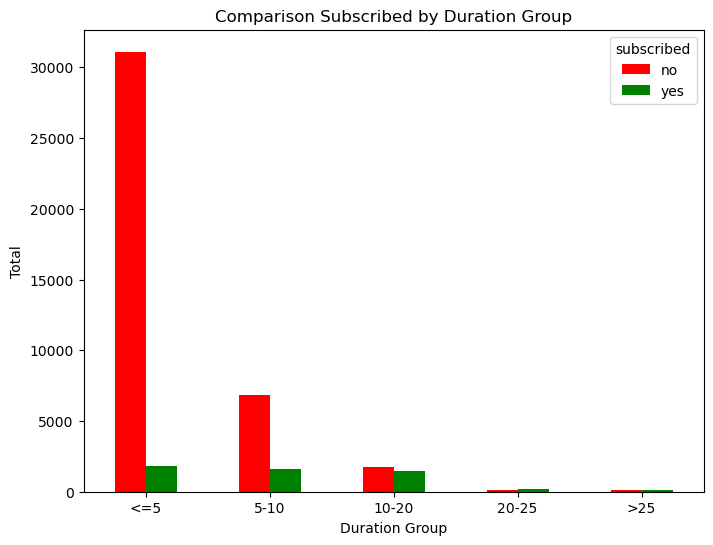

In [50]:
duration_order = ["<=5", "5-10", "10-20", "20-25", ">25"]

duration_piv.plot(kind='bar', figsize=(8,6), color=['red', 'green'])
plt.title("Comparison Subscribed by Duration Group")
plt.xlabel("Duration Group")
plt.xticks(rotation=0)
plt.ylabel("Total")
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 1 to 45211
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45211 non-null  int64   
 1   job             45211 non-null  object  
 2   marital         45211 non-null  object  
 3   education       45211 non-null  object  
 4   default         45211 non-null  object  
 5   balance         45211 non-null  int64   
 6   housing         45211 non-null  object  
 7   loan            45211 non-null  object  
 8   contact         45211 non-null  object  
 9   day             45211 non-null  int64   
 10  month           45211 non-null  object  
 11  duration        45211 non-null  float64 
 12  campaign        45211 non-null  int64   
 13  pdays           45211 non-null  int64   
 14  previous        45211 non-null  int64   
 15  poutcome        45211 non-null  object  
 16  y               45211 non-null  object  
 17  age_group       4

In [52]:
df['campaign'].sort_values()

customer_id
1         1
27795     1
27794     1
27793     1
27792     1
         ..
5460     50
4300     51
5074     55
11915    58
4331     63
Name: campaign, Length: 45211, dtype: int64

In [59]:
job_y = df.groupby('job')['y'].value_counts()
job_y_piv = job_y.reset_index()
job_y_piv.columns = ['job', 'subscription', 'total']
job_y_piv = job_y_piv.pivot(index='job', columns='subscription', values='total')
job_y_piv

subscription,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


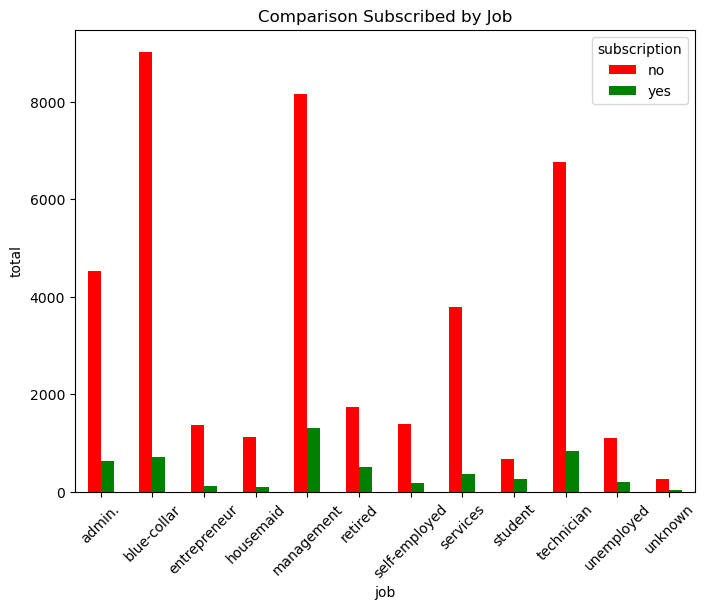

In [60]:
job_y_piv.plot(kind='bar', figsize=(8,6), color = ['red', 'green'])
plt.title("Comparison Subscribed by Job")
plt.xlabel("job")
plt.xticks(rotation=45)
plt.ylabel("total")
plt.show()

In [61]:
mart_y = df.groupby('marital')['y'].value_counts()
mart_y = mart_y.reset_index()
mart_y.columns = ['marital', 'subscription', 'total']
mart_y_piv = mart_y.pivot(index='marital', columns='subscription', values='total')
mart_y_piv

subscription,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


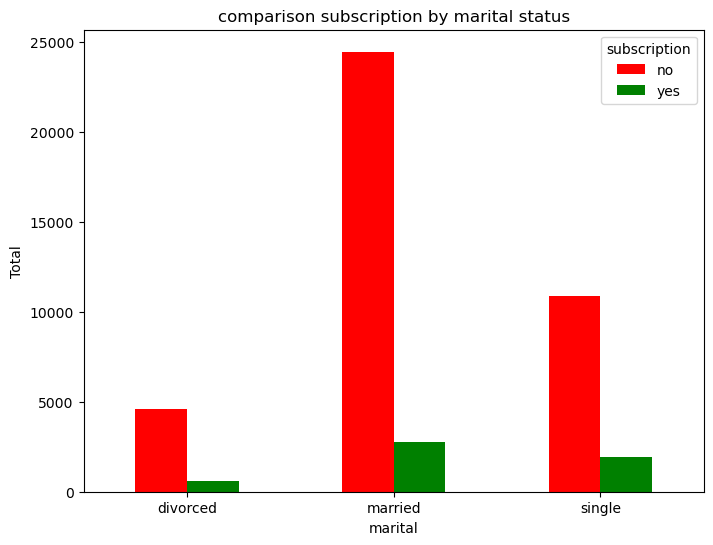

In [62]:
mart_y_piv.plot(kind='bar', figsize=(8,6), color=['red','green'])
plt.title("comparison subscription by marital status")
plt.xlabel("marital")
plt.xticks(rotation=0)
plt.ylabel("Total")
plt.show()